In [30]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [31]:
# get the data generated by gro

d = 'C:/Users/geeze/Desktop/'
f = 'output.csv'

df = pd.read_csv(d+f, header=None)
df.columns = ['id', 'time', 'syn_mrna', 'syn_prot', 'tox_mrna', 'tox_prot', 'vol']

In [32]:
df

,id,time,syn_mrna,syn_prot,tox_mrna,tox_prot,vol
0,0,11,0,0,0,0,1.57637
1,0,22,0,0,0,0,1.58145
2,0,33,0,0,0,0,1.58798
3,0,44,0,0,0,0,1.59215
4,0,55,0,0,0,0,1.59826
...,...,...,...,...,...,...,...
44940,163,103774,3,389,0,19,1.54648
44941,159,103774,5,523,1,22,1.82582
44942,161,103774,3,425,0,21,1.69683
44943,162,103785,11,675,1,43,2.14713


In [33]:
df['tox_conc'] = df['tox_prot'] / df['vol']

In [34]:
pop_size = []
for t in df['time'].unique():
    entries = df.loc[df['time'] == t]
    pop_size.append(len(entries))

In [35]:
means = []
for t in df['time'].unique():
    entries = df.loc[df['time'] == t]
    mean = entries['tox_conc'].mean()
    means.append(mean)

In [36]:
meandf = pd.DataFrame({'time' : df['time'].unique(), 'mean' : means})

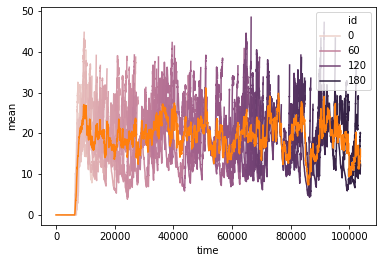

In [37]:
sns.lineplot(x='time', y='tox_conc', hue='id', data=df)
sns.lineplot(x='time', y='mean', data=meandf)

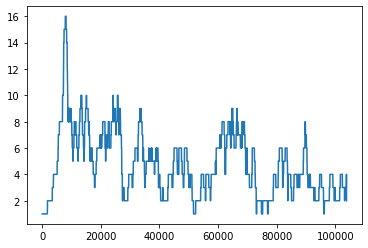

In [38]:
plt.plot(df['time'].unique(), pop_size)